Dataset: https://www.kaggle.com/datasets/vikasukani/parkinsons-disease-data-set

# Import Libraries

In [105]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from termcolor import colored
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
import tensorflow as tf


# Data Preprocessing

In [106]:
df=pd.read_csv('../input/parkinsons-disease-data-set/parkinsons.data')
df.shape


(195, 24)

In [107]:
df = df.copy()                                               

targetCol = 'status'                                                    # defining target column
targetColDf = df.pop(targetCol)                                     # popping target column from loanData df
df.insert(len(df.columns),targetCol, targetColDf)               # inserting target column to last column

# deleting variables that were used for changing column position of target column
del targetCol 
del targetColDf

# converting column names into lower case
df.columns = [c.lower() for c in df.columns]
# replacing spaces in column names with '_'
df.columns = [c.replace(' ', '_') for c in df.columns]
# replacing ':' in column names with '_'
df.columns = [c.replace(':', '_') for c in df.columns]
# replacing '(' in column names with '_'
df.columns = [c.replace('(', '_') for c in df.columns]
# replacing ')' in column names with '' i.e blank
df.columns = [c.replace(')', '') for c in df.columns]
# replacing '%' in column names with 'in_percent'
df.columns = [c.replace('%', 'in_percent') for c in df.columns]

df.head()

,name,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [108]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo_hz              195 non-null    float64
 2   mdvp_fhi_hz             195 non-null    float64
 3   mdvp_flo_hz             195 non-null    float64
 4   mdvp_jitter_in_percent  195 non-null    float64
 5   mdvp_jitter_abs         195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

In [110]:
df.describe()

,mdvp_fo_hz,mdvp_fhi_hz,mdvp_flo_hz,mdvp_jitter_in_percent,mdvp_jitter_abs,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,...,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


In [111]:
# Calculate missing data points
df.isna().sum()

name                      0
mdvp_fo_hz                0
mdvp_fhi_hz               0
mdvp_flo_hz               0
mdvp_jitter_in_percent    0
mdvp_jitter_abs           0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
status                    0
dtype: int64

In [112]:
# Calculate duplicate rows
df.duplicated().sum()

0

In [113]:
# Checking skewness of the data
df.skew().sort_values(ascending=False)

/tmp/ipykernel_32/2130671927.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=False)


nhr                       4.220709
jitter_ddp                3.362058
mdvp_rap                  3.360708
mdvp_jitter_in_percent    3.084946
mdvp_ppq                  3.073892
mdvp_jitter_abs           2.649071
mdvp_apq                  2.618047
mdvp_fhi_hz               2.542146
mdvp_shimmer_db           1.999389
shimmer_apq5              1.798697
mdvp_shimmer              1.666480
shimmer_dda               1.580618
shimmer_apq3              1.580576
mdvp_flo_hz               1.217350
ppe                       0.797491
mdvp_fo_hz                0.591737
spread1                   0.432139
d2                        0.430384
spread2                   0.144430
dfa                      -0.033214
rpde                     -0.143402
hnr                      -0.514317
status                   -1.187727
dtype: float64

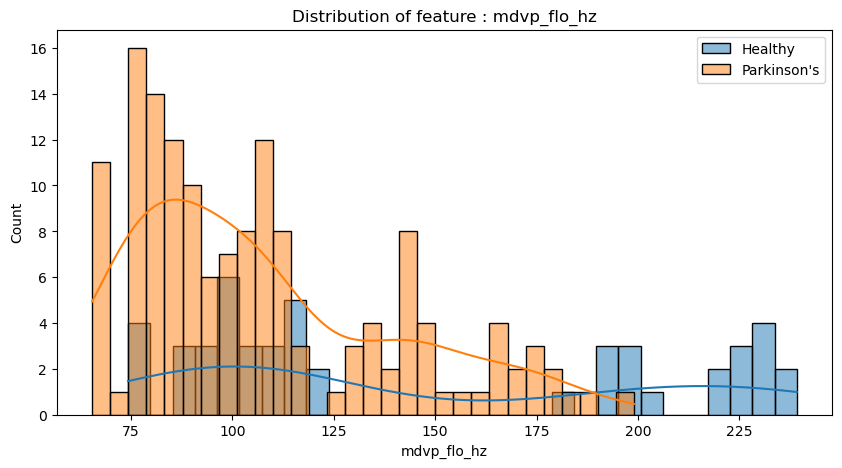

In [114]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn histplot to examine distribution of the feature of healthy patient
fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn histplot to examine distribution of the feature of Parkinson's patient
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

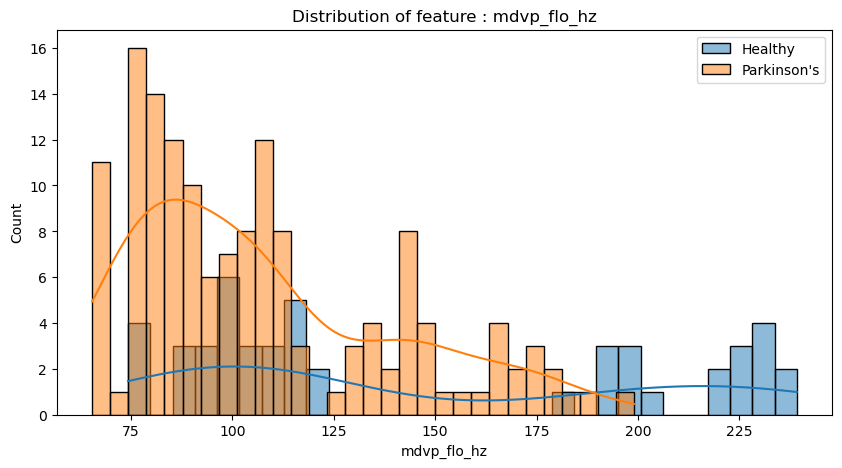

In [115]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn histplot to examine distribution of the feature of healthy patient
fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn histplot to examine distribution of the feature of Parkinson's patient
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

In [116]:
Q1 = df[feature].quantile(0.25)        # evaluating lower / first quartile
Q3 = df[feature].quantile(0.75)        # evaluating upper / third quartile
IQR = Q3 - Q1                              # evaluating Inter Quartile Range i.e IQR
'''
finding outliers which are mild outliers (Lower quartile - 1.5 times IQR) or
extreme outliers (Upper quartile + 1.5 times IQR)
'''
outliers = df[((df[feature] < (Q1 - 1.5 * IQR)) |(df[feature] > (Q3 + 1.5 * IQR)))][feature]

print("*"*125)
# printing mean, median and IQR for the feature
print("\033[1mFeature {0} : Mean = {1}, Median = {2} and Inter-Quartile-Range (IQR) = {3}\033[0m"
      .format(feature,round(np.mean(df[feature]),3),round(np.median(df[feature]),3),round(IQR,3))
     )
print()
print("*"*125)
# printing No of outliers, percentage of the data points are outliers and the values of the outliers
print("There are \033[1m{0} outliers\033[0m ({1} % of the data points) in \033[1m{2}\033[0m feature and the values are \033[1m{3}\033[0m"
.format(outliers.shape[0],round(((outliers.shape[0]/df[feature].shape[0])*100),3),feature,outliers.tolist()))
print("*"*125)

*****************************************************************************************************************************
Feature mdvp_flo_hz : Mean = 116.325, Median = 104.315 and Inter-Quartile-Range (IQR) = 55.728

*****************************************************************************************************************************
There are 9 outliers (4.615 % of the data points) in mdvp_flo_hz feature and the values are [225.227, 232.483, 232.435, 227.911, 231.848, 223.634, 229.256, 237.303, 239.17]
*****************************************************************************************************************************


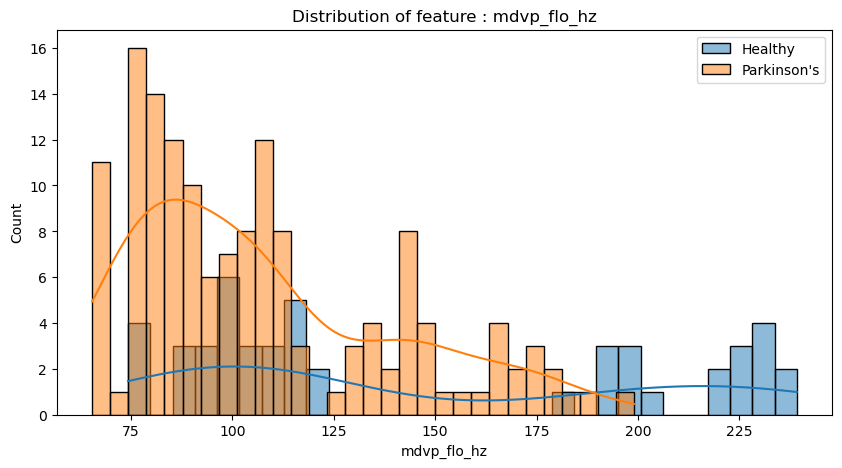

In [117]:
plt.figure(figsize=(10,5))                                         # setting figure size with width = 10 and height = 5
# seaborn histplot to examine distribution of the feature of healthy patient
fig = sns.histplot(df[df['status'] == 0][feature], bins=30, kde=True, label='Healthy')
# seaborn histplot to examine distribution of the feature of Parkinson's patient
fig = sns.histplot(df[df['status'] == 1][feature], bins=30, kde=True, label='Parkinson\'s')
plt.legend()
plt.title("Distribution of feature : "+feature)                    # setting title of the figure
plt.show()

We need to do these methods for all features.

# Data Visualization

In [118]:
df["status"].value_counts() ###is used to count the occurrences of each unique value in the "status" column of the DataFrame df

1    147
0     48
Name: status, dtype: int64

In [119]:
def plot_data(df, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = df.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(df[column_name], kde = True, color = 'darkblue')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=df[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

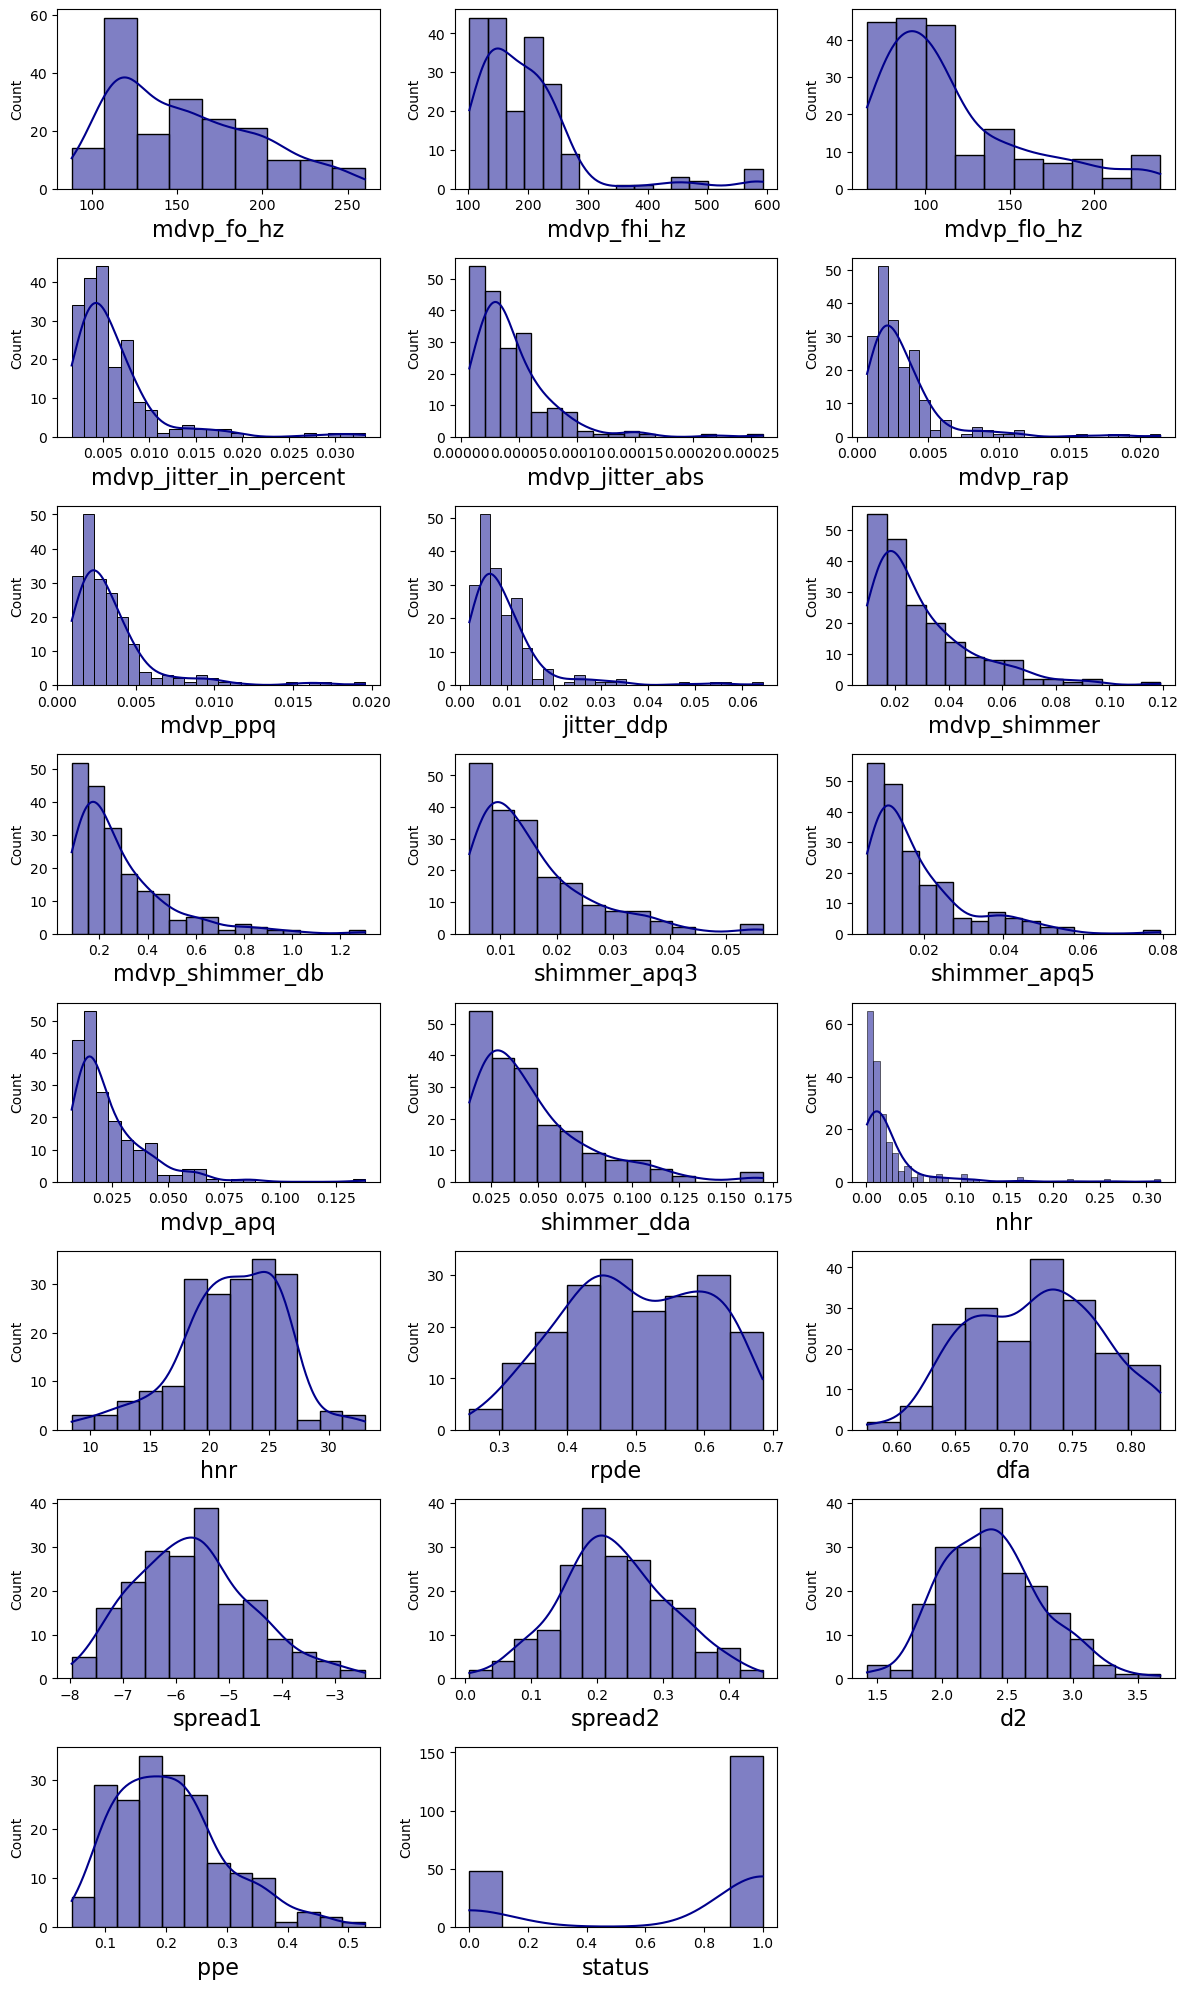

In [120]:
plot_data(df, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

In [121]:
correlation = df.corr()
status_corr = correlation.sort_values(by='status', ascending = False).iloc[:,-7]

/tmp/ipykernel_32/685894293.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


In [122]:
status_corr.to_frame().style.background_gradient(cmap='Blues')

,rpde
status,0.308567
spread1,0.591117
ppe,0.545886
spread2,0.479905
mdvp_shimmer,0.447424
mdvp_apq,0.451379
shimmer_apq5,0.399903
mdvp_shimmer_db,0.410684
shimmer_apq3,0.435242
shimmer_dda,0.435237


/tmp/ipykernel_32/287584861.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['status'][:-1].sort_values().plot(kind='bar')


<Axes: >

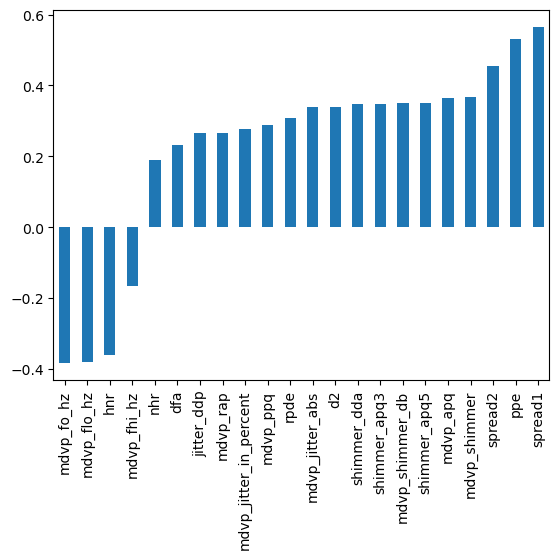

In [123]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')

# Normalize and Split Data

In [124]:
# Define the features (X) and the output labels (y)
X=df.drop(['name','status'],axis=1)
y=df["status"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
minmax = MinMaxScaler()

X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

# Logistic Regression

In [127]:
LR = LogisticRegression()
LR.fit(X_train_scaled,y_train)
y_pred_LR = LR.predict(X_test_scaled)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



Text(20.72222222222222, 0.5, 'Truth')

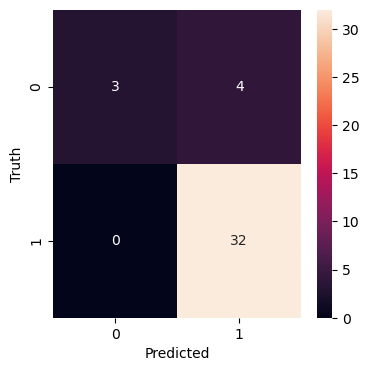

In [128]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_LR)
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# SVM

In [129]:
SVM = SVC(probability=True, kernel = 'linear')
SVM.fit(X_train_scaled,y_train)
y_pred_SVM = SVM.predict(X_test_scaled)
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



# Decision Tree

In [130]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train_scaled, y_train)
y_pred_DTC = DTC.predict(X_test_scaled)
print(classification_report(y_test, y_pred_DTC))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



# Random Forest

In [131]:
RFC=RandomForestClassifier(n_estimators=150)
RFC.fit(X_train_scaled, y_train)
y_pred_RFC = RFC.predict(X_test_scaled)
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# KNN

In [132]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# Conclusion

In [133]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_pred_LR, y_pred_SVM, y_pred_DTC, y_pred_RFC, y_pred_KNN are your prediction arrays
models = [
    ('Logistic Regression', y_pred_LR),
    ('Support Vector Machine(linear)', y_pred_SVM),
    ('Decision Tree', y_pred_DTC),
    ('Random Forest', y_pred_RFC),
    ('K-Nearest Neighbor', y_pred_KNN)
]

results = []
for model_name, y_pred in models:
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy
    })
    

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

print("Results without balancing the dataset:")
print('-' * 70)
display(results_df)


Results without balancing the dataset:
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.00000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.00000,0.941176,0.897436
2,Decision Tree,0.939394,0.96875,0.953846,0.923077
3,Random Forest,0.941176,1.00000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.00000,0.969697,0.948718


In [134]:
first_scenario_results = [
    {'Model': 'Logistic Regression', 'Precision': precision_score(y_test, y_pred_LR) , 'Recall': recall_score(y_test, y_pred_LR) ,
     'F1-Score': f1_score(y_test, y_pred_LR) , 'Accuracy': accuracy_score(y_test, y_pred_LR)},
    
    {'Model': 'Support Vector Machine(linear)', 'Precision': precision_score(y_test, y_pred_SVM), 'Recall': recall_score(y_test, y_pred_SVM),
     'F1-Score': f1_score(y_test, y_pred_SVM), 'Accuracy': accuracy_score(y_test, y_pred_SVM)},
    
    {'Model': 'Decision Tree', 'Precision': precision_score(y_test, y_pred_DTC), 'Recall': recall_score(y_test, y_pred_DTC),
     'F1-Score': f1_score(y_test, y_pred_DTC), 'Accuracy': accuracy_score(y_test, y_pred_DTC)},
    
    {'Model': 'Random Forest', 'Precision': precision_score(y_test, y_pred_RFC), 'Recall': recall_score(y_test, y_pred_RFC),
     'F1-Score': f1_score(y_test, y_pred_RFC), 'Accuracy': accuracy_score(y_test, y_pred_RFC)}, 

    {'Model': 'K-Nearest Neighbor', 'Precision': precision_score(y_test, y_pred_KNN), 'Recall': recall_score(y_test, y_pred_KNN),
     'F1-Score': f1_score(y_test, y_pred_KNN), 'Accuracy': accuracy_score(y_test, y_pred_KNN)},
    
]
first_scenario_results = pd.DataFrame(first_scenario_results).style.set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice[[3,4], :])
print("Results without balancing the dataset : ")
print('-'*70)
first_scenario_results

Results without balancing the dataset : 
----------------------------------------------------------------------


,Model,Precision,Recall,F1-Score,Accuracy
0,Logistic Regression,0.888889,1.000000,0.941176,0.897436
1,Support Vector Machine(linear),0.888889,1.000000,0.941176,0.897436
2,Decision Tree,0.939394,0.968750,0.953846,0.923077
3,Random Forest,0.941176,1.000000,0.969697,0.948718
4,K-Nearest Neighbor,0.941176,1.000000,0.969697,0.948718
